In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import math

## Task 4.1

Text(0.5, 1.0, 'image 4 (resized and grey)')

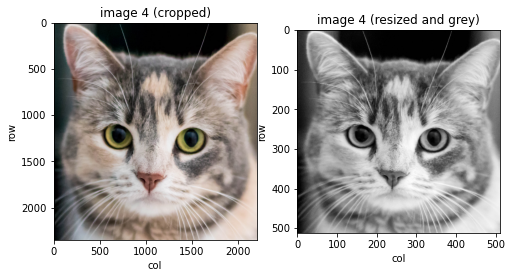

In [3]:
#NOTE Task 4.1
img4         = cv2.imread('images\image4.jpg')      # read image
img4         = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img4         = img4[200 : 2550, 1600 : 3800] # crop the image
img4_rs      = cv2.resize(img4, (512, 512)) # resize the image
img4_rs_grey = cv2.cvtColor(img4_rs, cv2.COLOR_RGB2GRAY)

fig_1 = plt.figure(figsize=(8, 16))
oriplot = fig_1.add_subplot(1, 2, 1)
oriplot.imshow(img4)
oriplot.set_xlabel('col')
oriplot.set_ylabel('row')
oriplot.set_title('image 4 (cropped)')

rsplot  = fig_1.add_subplot(1, 2, 2)
rsplot.imshow(img4_rs_grey, cmap = plt.cm.gray)
rsplot.set_xlabel('col')
rsplot.set_ylabel('row')
rsplot.set_title('image 4 (resized and grey)')


## Task 4.2

Text(0.5, 1.0, 'image 4 (orignal)')

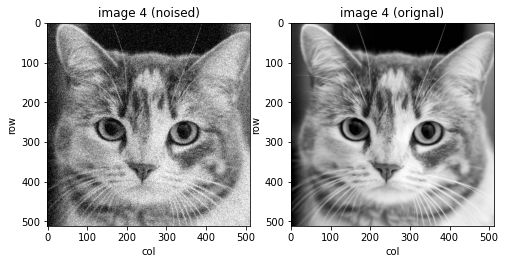

In [30]:
#NOTE Task 4.2
rs, cs   = img4_rs_grey.shape
noise_mx = np.random.normal(0, 15, (rs, cs)) # this is a guassian noise (rs x cs) matrix with mean 0, sigma 15

img4_rs_grey_noise = (img4_rs_grey + noise_mx).clip(0, 255).astype('uint8') # add the noise to the orignal image and insure the value is in [0,255]

fig_2     = plt.figure(figsize=(8, 16))
noiseplot = fig_2.add_subplot(1, 2, 1)
noiseplot.imshow(img4_rs_grey_noise, cmap = plt.cm.gray)
noiseplot.set_xlabel('col')
noiseplot.set_ylabel('row')
noiseplot.set_title('image 4 (noised)')

oriplot = fig_2.add_subplot(1, 2, 2)
oriplot.imshow(img4_rs_grey, cmap = plt.cm.gray)
oriplot.set_xlabel('col')
oriplot.set_ylabel('row')
oriplot.set_title('image 4 (orignal)')

## Task 4.3

Text(0, 0.5, 'freq')

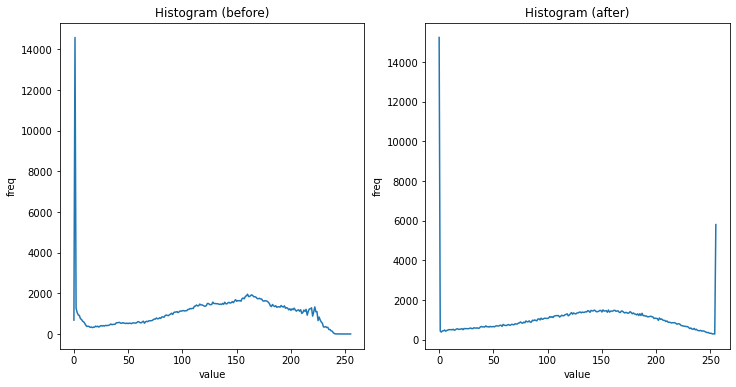

In [31]:
hist_ori   = cv2.calcHist([img4_rs_grey],       [0], None, [256], [0,256])
hist_noise = cv2.calcHist([img4_rs_grey_noise], [0], None, [256], [0,256])

fig_3     = plt.figure(figsize=(12, 6))
oriplot   = fig_3.add_subplot(1, 2, 1)
noiseplot = fig_3.add_subplot(1, 2, 2)

oriplot.plot(hist_ori)
noiseplot.plot(hist_noise)

oriplot.set_title('Histogram (before)')
noiseplot.set_title('Histogram (after)')

oriplot.set_xlabel('value')
oriplot.set_ylabel('freq')
noiseplot.set_xlabel('value')
noiseplot.set_ylabel('freq')

## Task 4.4

In [45]:
def create_kernel(σ, k_size):
    '''create the Guassain kernel for the Gaussian filter

        Args:
            k_size (int): used to a (k x k) kernel

        Returns:
            np.array: a (k x k) kernel
    '''
    kernel = np.zeros((k_size, k_size), dtype=np.float)
    for x in range(- (k_size // 2), (k_size // 2) + 1):
        for y in range(- (k_size // 2), (k_size // 2) + 1):
            kernel[x][y] = math.exp(-(x ** 2 + y ** 2)/(2 * σ ** 2))
    kernel = kernel / (np.sqrt(2 * np.pi * σ ** 2))
    kernel = kernel / np.sum(kernel) # normalise
    
    return kernel
    
def my_Gauss_filter(noisy_image, gausskernel):
    '''apply the kernel to the noisy image and will get a blurry image

        Args:
            noisy_image (np.array): the noisy image
            gausskernel (np.array):  result of create_kernel(σ, k_size)

        Returns:
            np.array: image after applying the gaussian filter
    '''
    rs, cs = noisy_image.shape
    result = np.zeros((rs, cs), dtype=np.uint8)
    for x in range(3 , rs - 3):
        for y in range(3, cs - 3):
            result[x][y] = int(np.sum(noisy_image[x - 3 : x + 4, y - 3 : y + 4] * gausskernel))
    
    return result


## Task 4.5

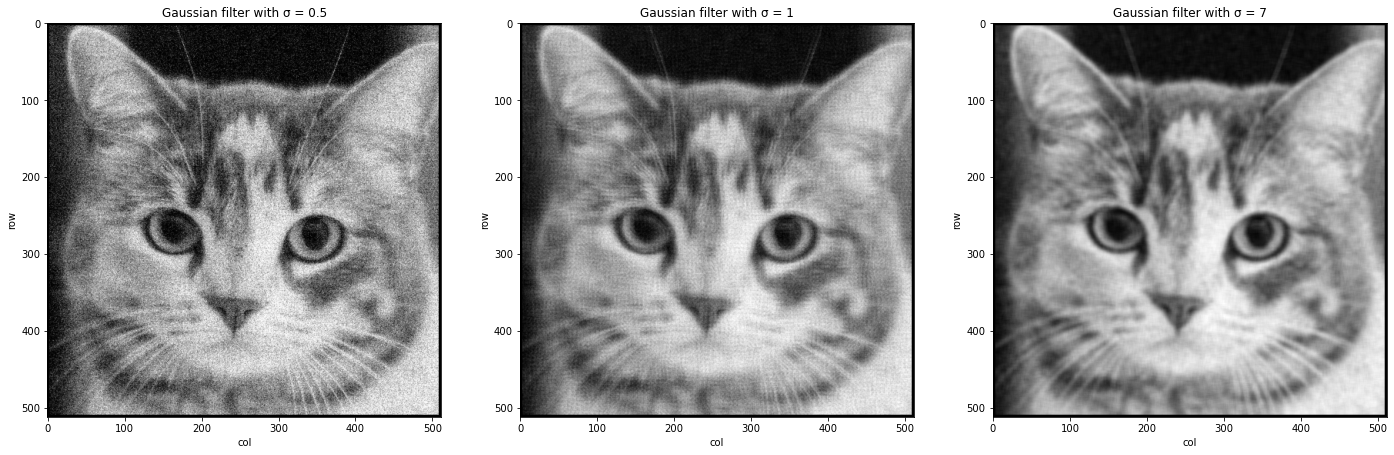

In [46]:
gausskernel1 = create_kernel(0.5, 7) # sigma = 0.5
gausskernel2 = create_kernel(1, 7) # sigma = 1
gausskernel3 = create_kernel(7, 7) # sigma = 7

denoised_img1 = my_Gauss_filter(img4_rs_grey_noise, gausskernel1)
denoised_img2 = my_Gauss_filter(img4_rs_grey_noise, gausskernel2)
denoised_img3 = my_Gauss_filter(img4_rs_grey_noise, gausskernel3)

fig_5 = plt.figure(figsize=(24, 24))
denoisedplot1 = fig_5.add_subplot(1, 3, 1)
denoisedplot2 = fig_5.add_subplot(1, 3, 2)
denoisedplot3 = fig_5.add_subplot(1, 3, 3)

denoisedplot1.set_title("Gaussian filter with σ = 0.5")
denoisedplot2.set_title("Gaussian filter with σ = 1")
denoisedplot3.set_title("Gaussian filter with σ = 7")

denoisedplot1.set_xlabel('col')
denoisedplot1.set_ylabel('row')

denoisedplot2.set_xlabel('col')
denoisedplot2.set_ylabel('row')

denoisedplot3.set_xlabel('col')
denoisedplot3.set_ylabel('row')

denoisedplot1.imshow(denoised_img1, cmap = plt.cm.gray)
denoisedplot2.imshow(denoised_img2, cmap = plt.cm.gray)
denoisedplot3.imshow(denoised_img3, cmap = plt.cm.gray)


## Task 4.6

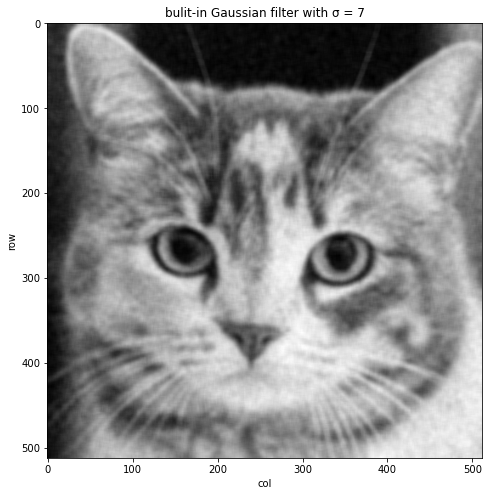

In [54]:
bulitin_img = cv2.GaussianBlur(img4_rs_grey_noise, (7,7), 7)

fig_5 = plt.figure(figsize=(8, 8))
denoisedplot1 = fig_5.add_subplot(1, 1, 1)
denoisedplot1.set_title("bulit-in Gaussian filter with σ = 7")
denoisedplot1.set_xlabel('col')
denoisedplot1.set_ylabel('row')

denoisedplot1.imshow(bulitin_img, cmap = plt.cm.gray)